# Tiền xử lý dữ liệu

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
url = 'https://raw.githubusercontent.com/imbich/Project-Machine-Learning/main/data/data_processed/data_processed.csv'
df = pd.read_csv(url)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294829,0.210069,2.490896,-1.823744,0.350082,-0.386404,-0.145586,0.075111,-0.584526,-0.329669,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
1,-0.294829,-0.167406,-0.554068,0.254153,0.350082,-0.386404,-0.145586,-1.254495,-1.218380,-0.829997,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,2
2,-0.294829,-1.111094,2.490896,-1.131112,0.350082,-0.386404,-0.145586,1.072315,0.954834,0.670987,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
3,-0.294829,0.210069,0.207173,1.177663,0.350082,-0.386404,-0.145586,1.183116,0.954834,-0.329669,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,2
4,1.356212,0.965018,-0.554068,-1.592866,-2.856470,-0.386404,-0.145586,1.072315,1.045384,0.670987,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294829,-1.111094,3.252137,1.177663,0.350082,-0.386404,-0.145586,-1.254495,-1.399481,-0.329669,...,-0.282442,-0.105726,-0.016033,0.187165,0.467631,-0.199441,1.476924,1.137005,-1.789667,2
4420,-0.294829,-1.111094,0.207173,1.177663,0.350082,-0.386404,10.150427,-1.254495,-1.399481,0.670987,...,-0.282442,-0.105726,-0.522682,-0.808050,0.147747,-0.199441,-0.175007,-0.454253,0.889126,0
4421,-0.294829,-1.111094,-0.554068,0.485030,0.350082,-0.386404,-0.145586,1.072315,0.954834,0.670987,...,-0.282442,0.805144,0.237291,-1.139788,0.627573,-0.199441,0.876222,-1.105222,0.347199,0
4422,-0.294829,-1.111094,-0.554068,-0.207602,0.350082,-0.386404,-0.145586,1.072315,0.954834,0.170659,...,-0.282442,-0.561161,-0.522682,0.187165,0.339678,-0.199441,-0.813253,-1.466871,-1.375511,2


In [21]:
data = df.drop(columns=['Target'])
label = df['Target']

# Chuẩn hóa dữ liệu
X_scaled = StandardScaler().fit_transform(data)

data_scaled = pd.DataFrame(X_scaled, columns = data.columns)


## Phân tích thành phần chính - PCA

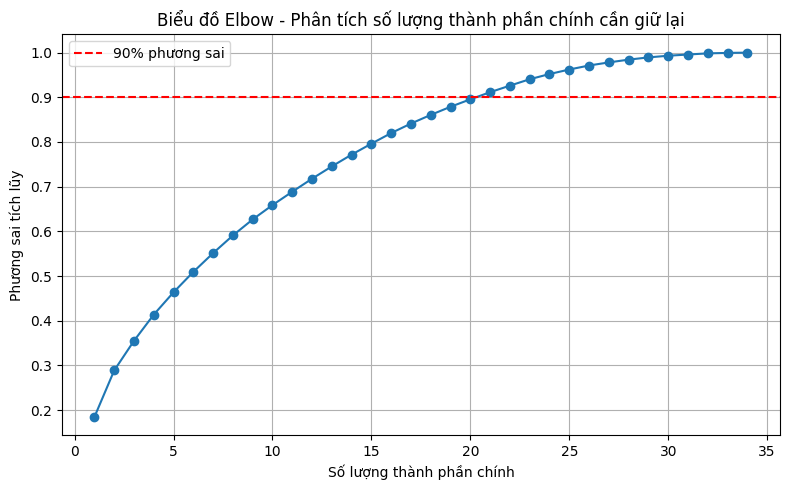

In [22]:
data_scaled['Target'] = label
# PCA
pca = PCA()
pca.fit(X_scaled)

# Explained variance
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', linestyle='-')
plt.title('Biểu đồ Elbow - Phân tích số lượng thành phần chính cần giữ lại')
plt.xlabel('Số lượng thành phần chính')
#Cumulative Explained Variance
plt.ylabel('Phương sai tích lũy')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% phương sai')
plt.legend()
plt.tight_layout()
plt.show()


⇒ Mục tiêu giữ lại 90% phương sai tương ứng với 20 thành phần đầu tiên

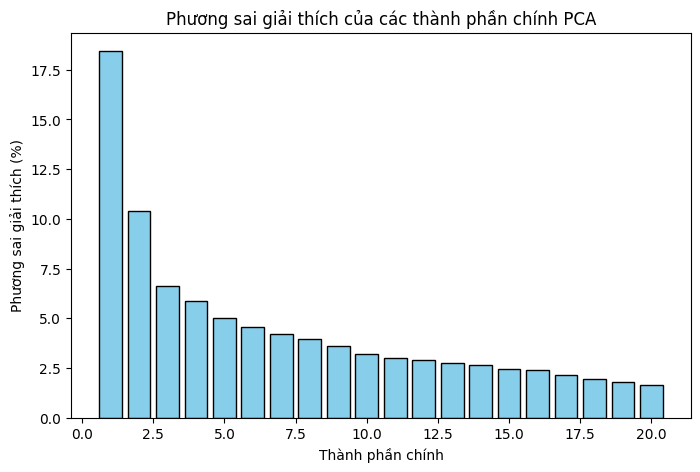

In [23]:
# Áp dụng PCA
pca = PCA(n_components=20)
data_pca = pca.fit_transform(X_scaled)

# Vẽ biểu đồ phương sai giải thích
plt.figure(figsize=(8, 5))
plt.bar(range(1,21), pca.explained_variance_ratio_ * 100, color='skyblue', edgecolor='black')
plt.xlabel('Thành phần chính')
plt.ylabel('Phương sai giải thích (%)')
plt.title('Phương sai giải thích của các thành phần chính PCA')
plt.show()


In [24]:
#df_pca
df_pca = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(20)])

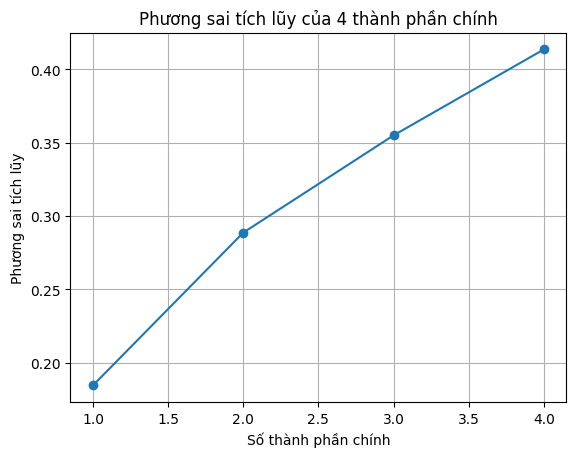

In [25]:
# Xác định lượng thông tin bảo tồn
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

plt.plot(range(1, 5), cumulative_var[:4], marker='o')
plt.title('Phương sai tích lũy của 4 thành phần chính')
plt.xlabel('Số thành phần chính')
plt.ylabel('Phương sai tích lũy')
plt.grid(True)
plt.show()

## Phân tích phân biệt tuyến tính - LDA

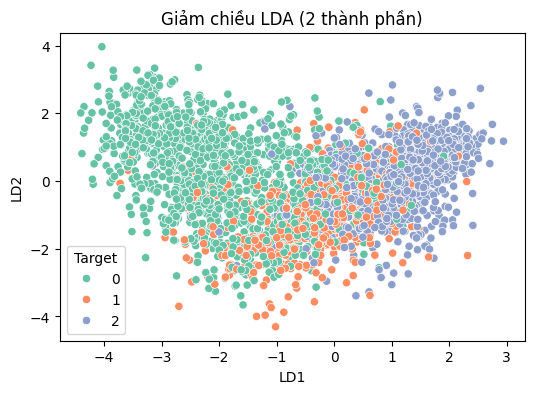

In [26]:
# Áp dụng LDA để giảm chiều
lda = LinearDiscriminantAnalysis(n_components=2)  # LDA giảm chiều xuống 2
data_lda = lda.fit_transform(X_scaled, label)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=data_lda[:, 0], y=data_lda[:, 1], hue=label, palette='Set2')
plt.title("Giảm chiều LDA (2 thành phần)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()



# Xây dựng mô hình phân loại

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# **Multiclass SVM**

## Dữ liệu gốc

### Train - Test 4:1

In [28]:
print("### Train - Test 4:1\n")
# Chia dữ liệu gốc
X_train_orig_80, X_test_orig_80, y_train_orig_80, y_test_orig_80 = train_test_split(
    data, label, test_size=0.2, random_state=42, stratify=label
)

# Chuẩn hóa tập train và test
scaler_orig_80 = StandardScaler()
X_train_orig_80_scaled = scaler_orig_80.fit_transform(X_train_orig_80)
X_test_orig_80_scaled = scaler_orig_80.transform(X_test_orig_80)

# Mô hình phân loại SVM
svm_model_orig_80 = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model_orig_80.fit(X_train_orig_80_scaled, y_train_orig_80)

# Đánh giá trên tập train
y_train_pred_orig_80 = svm_model_orig_80.predict(X_train_orig_80_scaled)
print("Train Accuracy:", round(accuracy_score(y_train_orig_80, y_train_pred_orig_80), 2))
print("Train Classification Report:\n", classification_report(y_train_orig_80, y_train_pred_orig_80, zero_division=0))

# Đánh giá trên tập test
y_test_pred_orig_80 = svm_model_orig_80.predict(X_test_orig_80_scaled)
print("Test Accuracy:", accuracy_score(y_test_orig_80, y_test_pred_orig_80))
print("Test Classification Report:\n", classification_report(y_test_orig_80, y_test_pred_orig_80, zero_division=0))


### Train - Test 4:1

Train Accuracy: 0.83
Train Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      1137
           1       0.73      0.51      0.60       635
           2       0.82      0.97      0.89      1767

    accuracy                           0.83      3539
   macro avg       0.82      0.76      0.78      3539
weighted avg       0.83      0.83      0.82      3539

Test Accuracy: 0.7593220338983051
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       284
           1       0.52      0.36      0.43       159
           2       0.78      0.93      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



### Train - Test 7:3

In [29]:
print("\n### Train - Test 7:3\n")
# Chia dữ liệu gốc
X_train_orig_70, X_test_orig_70, y_train_orig_70, y_test_orig_70 = train_test_split(
    data, label, test_size=0.3, random_state=42, stratify=label
)

# Chuẩn hóa tập train và test
scaler_orig_70 = StandardScaler()
X_train_orig_70_scaled = scaler_orig_70.fit_transform(X_train_orig_70)
X_test_orig_70_scaled = scaler_orig_70.transform(X_test_orig_70)

# Mô hình phân loại SVM
svm_model_orig_70 = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model_orig_70.fit(X_train_orig_70_scaled, y_train_orig_70)

# Đánh giá trên tập train
y_train_pred_orig_70 = svm_model_orig_70.predict(X_train_orig_70_scaled)
print("Train Accuracy:", round(accuracy_score(y_train_orig_70, y_train_pred_orig_70), 2))
print("Train Classification Report:\n", classification_report(y_train_orig_70, y_train_pred_orig_70, zero_division=0))

# Đánh giá trên tập test
y_test_pred_orig_70 = svm_model_orig_70.predict(X_test_orig_70_scaled)
print("Test Accuracy:", round(accuracy_score(y_test_orig_70, y_test_pred_orig_70), 2))
print("Test Classification Report:\n", classification_report(y_test_orig_70, y_test_pred_orig_70, zero_division=0))


### Train - Test 7:3

Train Accuracy: 0.83
Train Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85       994
           1       0.73      0.50      0.59       556
           2       0.82      0.97      0.89      1546

    accuracy                           0.83      3096
   macro avg       0.82      0.76      0.78      3096
weighted avg       0.83      0.83      0.82      3096

Test Accuracy: 0.76
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77       427
           1       0.49      0.34      0.40       238
           2       0.78      0.93      0.85       663

    accuracy                           0.76      1328
   macro avg       0.70      0.66      0.67      1328
weighted avg       0.74      0.76      0.74      1328



### Train - Test 6:4

In [30]:
print("\n### Train - Test 6:4\n")
# Chia dữ liệu gốc
X_train_orig_60, X_test_orig_60, y_train_orig_60, y_test_orig_60 = train_test_split(
    data, label, test_size=0.4, random_state=42, stratify=label
)

# Chuẩn hóa tập train và test
scaler_orig_60 = StandardScaler()
X_train_orig_60_scaled = scaler_orig_60.fit_transform(X_train_orig_60)
X_test_orig_60_scaled = scaler_orig_60.transform(X_test_orig_60)

# Mô hình phân loại SVM
svm_model_orig_60 = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model_orig_60.fit(X_train_orig_60_scaled, y_train_orig_60)

# Đánh giá trên tập train
y_train_pred_orig_60 = svm_model_orig_60.predict(X_train_orig_60_scaled)
print("Train Accuracy:", round(accuracy_score(y_train_orig_60, y_train_pred_orig_60), 2))
print("Train Classification Report:\n", classification_report(y_train_orig_60, y_train_pred_orig_60, zero_division=0))

# Đánh giá trên tập test
y_test_pred_orig_60 = svm_model_orig_60.predict(X_test_orig_60_scaled)
print("Test Accuracy:", round(accuracy_score(y_test_orig_60, y_test_pred_orig_60), 2))
print("Test Classification Report:\n", classification_report(y_test_orig_60, y_test_pred_orig_60, zero_division=0))


### Train - Test 6:4

Train Accuracy: 0.83
Train Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       853
           1       0.73      0.49      0.58       476
           2       0.82      0.96      0.89      1325

    accuracy                           0.83      2654
   macro avg       0.81      0.76      0.77      2654
weighted avg       0.83      0.83      0.82      2654

Test Accuracy: 0.77
Test Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78       568
           1       0.53      0.37      0.44       318
           2       0.79      0.93      0.85       884

    accuracy                           0.77      1770
   macro avg       0.71      0.68      0.69      1770
weighted avg       0.75      0.77      0.75      1770



## Dữ liệu PCA(20 chiều)

### Train - Test 4:1

In [31]:
### Train - Test 4:1 (80:20)
print("### Train - Test 4:1\n")
# Chia dữ liệu
data_pca = df_pca.copy()
X_train_pca_80, X_test_pca_80, y_train_pca_80, y_test_pca_80 = train_test_split(
    data_pca, label, test_size=0.2, random_state=42, stratify=label
)

# Mô hình phân loại SVM
svm_model_pca_80 = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model_pca_80.fit(X_train_pca_80, y_train_pca_80)

# Đánh giá trên tập train
y_train_pred_pca_80 = svm_model_pca_80.predict(X_train_pca_80)
print("Train Accuracy:", round(accuracy_score(y_train_pca_80, y_train_pred_pca_80), 2))
print("Train Classification Report:\n", classification_report(y_train_pca_80, y_train_pred_pca_80, zero_division=0))

# Đánh giá trên tập test
y_test_pred_pca_80 = svm_model_pca_80.predict(X_test_pca_80)
print("Test Accuracy:", round(accuracy_score(y_test_pca_80, y_test_pred_pca_80), 2))
print("Test Classification Report:\n", classification_report(y_test_pca_80, y_test_pred_pca_80, zero_division=0))

### Train - Test 4:1

Train Accuracy: 0.81
Train Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1137
           1       0.70      0.45      0.55       635
           2       0.80      0.96      0.88      1767

    accuracy                           0.81      3539
   macro avg       0.79      0.73      0.75      3539
weighted avg       0.81      0.81      0.80      3539

Test Accuracy: 0.75
Test Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77       284
           1       0.47      0.35      0.40       159
           2       0.78      0.91      0.84       442

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.67       885
weighted avg       0.73      0.75      0.74       885



### Train - Test 7:3

In [32]:
print("\n### Train - Test 7:3\n")
# Chia dữ liệu
X_train_pca_70, X_test_pca_70, y_train_pca_70, y_test_pca_70 = train_test_split(
    data_pca, label, test_size=0.3, random_state=42, stratify=label
)

# Mô hình phân loại SVM
svm_model_pca_70 = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model_pca_70.fit(X_train_pca_70, y_train_pca_70)

# Đánh giá trên tập train
y_train_pred_pca_70 = svm_model_pca_70.predict(X_train_pca_70)
print("Train Accuracy:", round(accuracy_score(y_train_pca_70, y_train_pred_pca_70), 2))
print("Train Classification Report:\n", classification_report(y_train_pca_70, y_train_pred_pca_70, zero_division=0))

# Đánh giá trên tập test
y_test_pred_pca_70 = svm_model_pca_70.predict(X_test_pca_70)
print("Test Accuracy:", round(accuracy_score(y_test_pca_70, y_test_pred_pca_70), 2))
print("Test Classification Report:\n", classification_report(y_test_pca_70, y_test_pred_pca_70, zero_division=0))


### Train - Test 7:3

Train Accuracy: 0.81
Train Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       994
           1       0.69      0.46      0.55       556
           2       0.80      0.96      0.88      1546

    accuracy                           0.81      3096
   macro avg       0.79      0.73      0.75      3096
weighted avg       0.81      0.81      0.80      3096

Test Accuracy: 0.75
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       427
           1       0.51      0.34      0.41       238
           2       0.77      0.92      0.84       663

    accuracy                           0.75      1328
   macro avg       0.70      0.66      0.67      1328
weighted avg       0.74      0.75      0.74      1328



### Train - Test 6:4

In [ ]:
print("\n### Train - Test 6:4\n")
# Chia dữ liệu
X_train_pca_60, X_test_pca_60, y_train_pca_60, y_test_pca_60 = train_test_split(
    data_pca, label, test_size=0.4, random_state=42, stratify=label
)

# Mô hình phân loại SVM
svm_model_pca_60 = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model_pca_60.fit(X_train_pca_60, y_train_pca_60)

# Đánh giá trên tập train
y_train_pred_pca_60 = svm_model_pca_60.predict(X_train_pca_60)
print("Train Accuracy:", round(accuracy_score(y_train_pca_60, y_train_pred_pca_60), 2))
print("Train Classification Report:\n", classification_report(y_train_pca_60, y_train_pred_pca_60, zero_division=0))

# Đánh giá trên tập test
y_test_pred_pca_60 = svm_model_pca_60.predict(X_test_pca_60)
print("Test Accuracy:", round(accuracy_score(y_test_pca_60, y_test_pred_pca_60), 2))
print("Test Classification Report:\n", classification_report(y_test_pca_60, y_test_pred_pca_60, zero_division=0))


### Train - Test 6:4

Train Accuracy: 0.81
Train Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       853
           1       0.68      0.43      0.53       476
           2       0.80      0.96      0.87      1325

    accuracy                           0.81      2654
   macro avg       0.79      0.73      0.74      2654
weighted avg       0.80      0.81      0.80      2654

Test Accuracy: 0.76
Test Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.78       568
           1       0.53      0.38      0.44       318
           2       0.78      0.92      0.84       884

    accuracy                           0.76      1770
   macro avg       0.71      0.68      0.69      1770
weighted avg       0.75      0.76      0.75      1770



## Dữ liệu LDA(2 chiều)

### Train - Test 4:1

In [33]:
### Train - Test 4:1 (80:20)
print("### Train - Test 4:1\n")
# Chia dữ liệu
X_train_lda_80, X_test_lda_80, y_train_lda_80, y_test_lda_80 = train_test_split(
    data_lda, label, test_size=0.2, random_state=42, stratify=label
)

# Mô hình phân loại SVM
svm_model_lda_80 = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model_lda_80.fit(X_train_lda_80, y_train_lda_80)

# Đánh giá trên tập train
y_train_pred_lda_80 = svm_model_lda_80.predict(X_train_lda_80)
print("Train Accuracy:", round(accuracy_score(y_train_lda_80, y_train_pred_lda_80), 2))
print("Train Classification Report:\n", classification_report(y_train_lda_80, y_train_pred_lda_80, zero_division=0))

# Đánh giá trên tập test
y_test_pred_lda_80 = svm_model_lda_80.predict(X_test_lda_80)
print("Test Accuracy:", round(accuracy_score(y_test_lda_80, y_test_pred_lda_80), 2))
print("Test Classification Report:\n", classification_report(y_test_lda_80, y_test_pred_lda_80, zero_division=0))

### Train - Test 4:1

Train Accuracy: 0.77
Train Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      1137
           1       0.56      0.31      0.40       635
           2       0.77      0.95      0.85      1767

    accuracy                           0.77      3539
   macro avg       0.73      0.67      0.68      3539
weighted avg       0.76      0.77      0.75      3539

Test Accuracy: 0.77
Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       284
           1       0.54      0.33      0.41       159
           2       0.78      0.95      0.86       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885



### Train - Test 7:3

In [34]:
print("\n### Train - Test 7:3\n")
# Chia dữ liệu
X_train_lda_70, X_test_lda_70, y_train_lda_70, y_test_lda_70 = train_test_split(
    data_lda, label, test_size=0.3, random_state=42, stratify=label
)

# Mô hình phân loại SVM
svm_model_lda_70 = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model_lda_70.fit(X_train_lda_70, y_train_lda_70)

# Đánh giá trên tập train
y_train_pred_lda_70 = svm_model_lda_70.predict(X_train_lda_70)
print("Train Accuracy:", round(accuracy_score(y_train_lda_70, y_train_pred_lda_70), 2))
print("Train Classification Report:\n", classification_report(y_train_lda_70, y_train_pred_lda_70, zero_division=0))

# Đánh giá trên tập test
y_test_pred_lda_70 = svm_model_lda_70.predict(X_test_lda_70)
print("Test Accuracy:", round(accuracy_score(y_test_lda_70, y_test_pred_lda_70), 2))
print("Test Classification Report:\n", classification_report(y_test_lda_70, y_test_pred_lda_70, zero_division=0))


### Train - Test 7:3

Train Accuracy: 0.77
Train Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       994
           1       0.55      0.31      0.40       556
           2       0.77      0.95      0.85      1546

    accuracy                           0.77      3096
   macro avg       0.73      0.67      0.68      3096
weighted avg       0.76      0.77      0.75      3096

Test Accuracy: 0.77
Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       427
           1       0.55      0.32      0.41       238
           2       0.78      0.95      0.86       663

    accuracy                           0.77      1328
   macro avg       0.72      0.67      0.69      1328
weighted avg       0.76      0.77      0.76      1328



### Train - Test 6:4

In [35]:
print("\n### Train - Test 6:4\n")
# Chia dữ liệu
X_train_lda_60, X_test_lda_60, y_train_lda_60, y_test_lda_60 = train_test_split(
    data_lda, label, test_size=0.4, random_state=42, stratify=label
)

# Mô hình phân loại SVM
svm_model_lda_60 = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model_lda_60.fit(X_train_lda_60, y_train_lda_60)

# Đánh giá trên tập train
y_train_pred_lda_60 = svm_model_lda_60.predict(X_train_lda_60)
print("Train Accuracy:", round(accuracy_score(y_train_lda_60, y_train_pred_lda_60), 2))
print("Train Classification Report:\n", classification_report(y_train_lda_60, y_train_pred_lda_60, zero_division=0))

# Đánh giá trên tập test
y_test_pred_lda_60 = svm_model_lda_60.predict(X_test_lda_60)
print("Test Accuracy:", round(accuracy_score(y_test_lda_60, y_test_pred_lda_60), 2))
print("Test Classification Report:\n", classification_report(y_test_lda_60, y_test_pred_lda_60, zero_division=0))


### Train - Test 6:4

Train Accuracy: 0.77
Train Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       853
           1       0.54      0.30      0.39       476
           2       0.77      0.94      0.85      1325

    accuracy                           0.77      2654
   macro avg       0.72      0.67      0.68      2654
weighted avg       0.75      0.77      0.75      2654

Test Accuracy: 0.77
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       568
           1       0.54      0.31      0.39       318
           2       0.78      0.95      0.86       884

    accuracy                           0.77      1770
   macro avg       0.72      0.67      0.68      1770
weighted avg       0.75      0.77      0.75      1770



## Trực quan kết quả

In [36]:
scaler_global = StandardScaler()
data_scaled = scaler_global.fit_transform(data)
# Dữ liệu gốc (đã chuẩn hóa toàn cục)
X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(
    data_scaled, label, test_size=0.2, random_state=42, stratify=label
)

# Dữ liệu PCA
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(
    data_pca, label, test_size=0.2, random_state=42, stratify=label
)

# Dữ liệu LDA
X_train_lda, X_val_lda, y_train_lda, y_val_lda = train_test_split(
    data_lda, label, test_size=0.2, random_state=42, stratify=label
)


Đang tính các Chỉ số SVM (Accuracy, Precision, Recall, F1-score)...
SVM Dữ liệu gốc Chỉ số: [0.7593220338983051, 0.7474697777135118, 0.7593220338983051, 0.7463964837242328]
SVM PCA Chỉ số: [0.7480225988700565, 0.7348864567133092, 0.7480225988700565, 0.7362008078762793]
SVM LDA Chỉ số: [0.7728813559322034, 0.757901097113748, 0.7728813559322034, 0.7557866266315508]


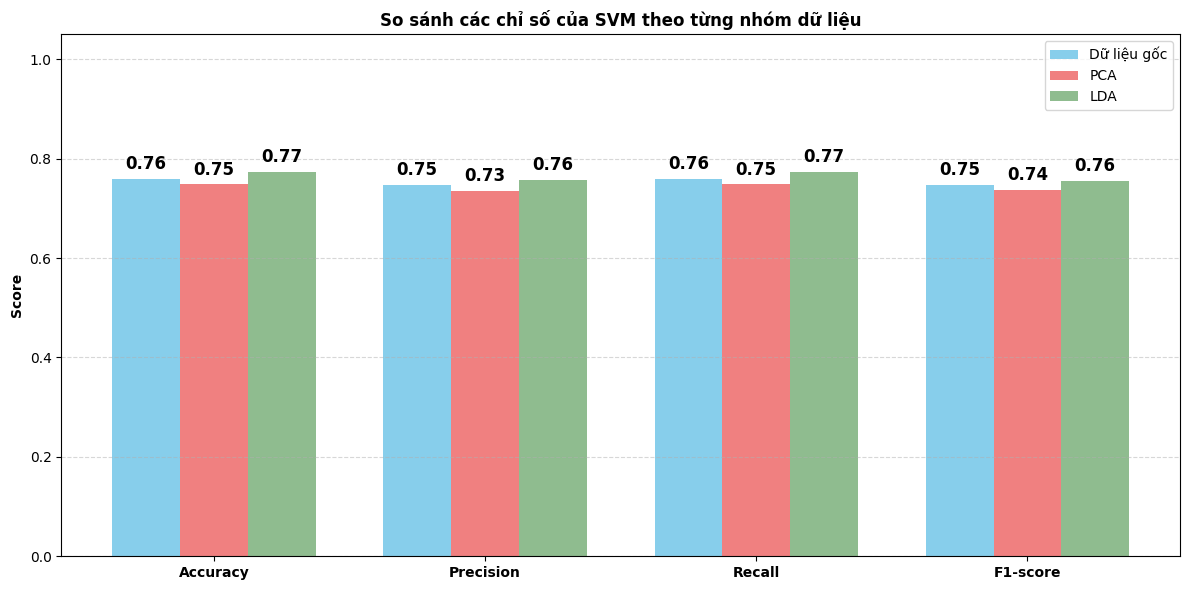

In [37]:
def evaluate_svm(X_t, X_v, y_train, y_val, C_param=1.0):
    """
    Huấn luyện mô hình SVM và trả về Accuracy, Precision, Recall, và F1-score
    trên tập validation (test).
    """
    svm = SVC(kernel='rbf', C=C_param, random_state=42)
    svm.fit(X_t, y_train)
    y_pred = svm.predict(X_v) # Dự đoán trên tập validation/test

    report = classification_report(y_val, y_pred, output_dict=True, zero_division=0)
    acc = accuracy_score(y_val, y_pred)
    # Trích xuất các chỉ số trung bình có trọng số từ báo cáo
    metrics = [
        acc,
        report['weighted avg']['precision'],
        report['weighted avg']['recall'],
        report['weighted avg']['f1-score']
    ]
    return metrics

# Tính tất cả các chỉ số cho SVM (sử dụng tập validation/test)
print("\nĐang tính các Chỉ số SVM (Accuracy, Precision, Recall, F1-score)...")
svm_original_metrics = evaluate_svm(X_train_orig, X_val_orig, y_train_orig, y_val_orig)
svm_pca_metrics = evaluate_svm(X_train_pca, X_val_pca, y_train_pca, y_val_pca)
svm_lda_metrics = evaluate_svm(X_train_lda, X_val_lda, y_train_lda, y_val_lda)

print(f"SVM Dữ liệu gốc Chỉ số: {svm_original_metrics}")
print(f"SVM PCA Chỉ số: {svm_pca_metrics}")
print(f"SVM LDA Chỉ số: {svm_lda_metrics}")


# Vẽ biểu đồ so sánh các chỉ số của SVM
labels_metrics_plot = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x_metrics_plot = np.arange(len(labels_metrics_plot))
width_metrics_plot = 0.25

plt.figure(figsize=(12, 6))

plt.bar(x_metrics_plot - width_metrics_plot, svm_original_metrics, width_metrics_plot, label='Dữ liệu gốc', color='skyblue')
plt.bar(x_metrics_plot, svm_pca_metrics, width_metrics_plot, label='PCA', color='lightcoral')
plt.bar(x_metrics_plot + width_metrics_plot, svm_lda_metrics, width_metrics_plot, label='LDA', color='darkseagreen')

plt.xticks(x_metrics_plot, labels_metrics_plot, fontweight='bold')
plt.ylim(0, 1.05)
plt.ylabel('Score', fontweight='bold')
plt.title('So sánh các chỉ số của SVM theo từng nhóm dữ liệu', fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Hiển thị giá trị trên từng cột
for i in range(len(x_metrics_plot)):
    plt.text(x_metrics_plot[i] - width_metrics_plot, svm_original_metrics[i] + 0.02, f"{svm_original_metrics[i]:.2f}",
             ha='center', fontsize=12, fontweight='bold')
    plt.text(x_metrics_plot[i], svm_pca_metrics[i] + 0.02, f"{svm_pca_metrics[i]:.2f}",
             ha='center', fontsize=12, fontweight='bold')
    plt.text(x_metrics_plot[i] + width_metrics_plot, svm_lda_metrics[i] + 0.02, f"{svm_lda_metrics[i]:.2f}",
             ha='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

### So sánh Train/Test Accuracy của SVM

Đang tính Độ chính xác Train/Test của SVM...
SVM Dữ liệu gốc - Train Acc: 0.8330, Test Acc: 0.7593
SVM PCA - Train Acc: 0.8132, Test Acc: 0.7480
SVM LDA - Train Acc: 0.7720, Test Acc: 0.7729


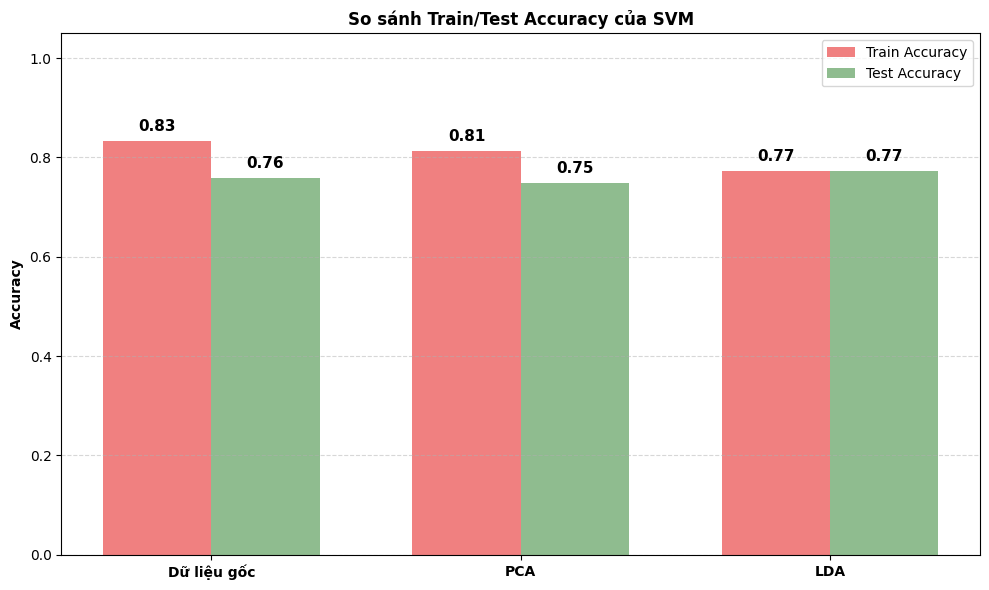

In [38]:
def train_test_svm_accuracy(X_train, X_val, y_train, y_val, C_param=1.0):
    """
    Huấn luyện mô hình SVM và trả về độ chính xác trên cả tập huấn luyện và tập validation.
    X_train và X_val DỰ KIẾN LÀ ĐÃ ĐƯỢC XỬ LÝ (chuẩn hóa/giảm chiều).
    """
    svm = SVC(kernel='rbf', C=C_param, random_state=42)
    svm.fit(X_train, y_train)

    y_train_pred = svm.predict(X_train)
    y_val_pred = svm.predict(X_val)

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_val = accuracy_score(y_val, y_val_pred)

    return acc_train, acc_val

# Tính Độ chính xác trên tập Train và Test cho SVM
print("Đang tính Độ chính xác Train/Test của SVM...")


acc_train_svm_original, acc_val_svm_original = train_test_svm_accuracy(X_train_orig, X_val_orig, y_train_orig, y_val_orig)
acc_train_svm_pca, acc_val_svm_pca = train_test_svm_accuracy(X_train_pca, X_val_pca, y_train_pca, y_val_pca)
acc_train_svm_lda, acc_val_svm_lda = train_test_svm_accuracy(X_train_lda, X_val_lda, y_train_lda, y_val_lda)

print(f"SVM Dữ liệu gốc - Train Acc: {acc_train_svm_original:.4f}, Test Acc: {acc_val_svm_original:.4f}")
print(f"SVM PCA - Train Acc: {acc_train_svm_pca:.4f}, Test Acc: {acc_val_svm_pca:.4f}")
print(f"SVM LDA - Train Acc: {acc_train_svm_lda:.4f}, Test Acc: {acc_val_svm_lda:.4f}")


# Chuẩn bị dữ liệu để vẽ biểu đồ Độ chính xác Train/Test
labels_acc_plot = ['Dữ liệu gốc', 'PCA', 'LDA']
train_accs_svm = [acc_train_svm_original, acc_train_svm_pca, acc_train_svm_lda]
val_accs_svm = [acc_val_svm_original, acc_val_svm_pca, acc_val_svm_lda]

x_acc_plot = np.arange(len(labels_acc_plot))
width_acc_plot = 0.35

# Vẽ biểu đồ So sánh Train/Test Accuracy của SVM
plt.figure(figsize=(10, 6))
plt.bar(x_acc_plot - width_acc_plot/2, train_accs_svm, width_acc_plot, label='Train Accuracy', color='lightcoral')
plt.bar(x_acc_plot + width_acc_plot/2, val_accs_svm, width_acc_plot, label='Test Accuracy', color='darkseagreen')

plt.xticks(x_acc_plot, labels_acc_plot, fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.ylim(0, 1.05)
plt.title('So sánh Train/Test Accuracy của SVM', fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Thêm giá trị số lên trên mỗi cột
for i in range(len(x_acc_plot)):
    plt.text(x_acc_plot[i] - width_acc_plot/2, train_accs_svm[i] + 0.02, f"{train_accs_svm[i]:.2f}",
             ha='center', fontsize=11, fontweight='bold')
    plt.text(x_acc_plot[i] + width_acc_plot/2, val_accs_svm[i] + 0.02, f"{val_accs_svm[i]:.2f}",
             ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()
